# Titanic Project

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [76]:
df=pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Observation from the dataset:
    
    We have 891 data points in the training set. The data is contained under 12 headings(columns). The target variable is      
    Survived which has a value of 0 or 1 based on whether a certain person died or survived the sinking. So, it is essentially a classification problem.
    We need to treat string and nan values present in the dataset.

# Dataset Overview

In [77]:
df.shape

(891, 12)

In [78]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


At a glance, we can say the following about the data set-

1. Columns Age , Cabin and Embarked have missing values.
2. The columns Sex, Ticket, Cabin and Embarked contain values of object type. These columns have to be encoded before any modelling is done.

In [80]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [81]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Statistic summary

In [82]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can infer the following about the numerical columns:

1. PassengerId - This column is just like a Serial Number from 1 to 891. Hence, it is not of much use.
2. Survived - This is the target column. From the mean and median, we can conclusively say that there were more casualties than survivors.
3. PClass - Although it is a numerical column, it seems that it holds categorical data. We will go into this later.
4. Age - As mentioned earlier, Age has some missing values. By looking at the summary, we can say that Age has a fairly normal distribution. This will be proven as correct or wrong later when we visualize the data.
5. SibSp - This column is not a normal distribution, as the mean and median are far apart.
6. Parch - This column is not a normal distribution, as the mean and median are far apart.
7. Fare - This column is not a normal distribution, as the mean and median are far apart. We have to normalise it.

# Finding Null Values

In [83]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [84]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [85]:
#Embarked Column has 2 missing values. Let us look at its categories.

df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

The Embarked column has 2 missing values. From its analysis, we can see that 'S' has the highest frequency. 

We also find that if we make the missing values equal to either of 'S','C' or 'Q', it won't make a huge difference to our analysis and model. So,I decided to replace the null values with the mode, which is 'S'.

In [86]:
df['Embarked'].fillna('S',inplace = True)
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

From the Summary of the Age column, we got to know that Age has a normal distribution because the mean = 29.699 is very close to the median = 28.0. 

We have 177 missing values in Age. Age can play a vital role in determining whether a person survived or not. We have two options to replace the missing values. 

One, we can replace them with the mean of the column or two, we can replace them with the median of the column. As it seems, we can replace them with either mean or median and it won't make a huge difference. I decided to replace the null values with the median, as median is much more robust to outliers than mean.

In [87]:
df['Age'].fillna(df['Age'].median(),inplace = True)


In [88]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [89]:
#similarly with cabin column

df["Cabin"].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F2             3
F33            3
              ..
C82            1
C90            1
A7             1
D30            1
A24            1
Name: Cabin, Length: 147, dtype: int64

In [90]:
df['Cabin'].fillna("U",inplace = True)

In [91]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [92]:
df["Cabin"].value_counts()

U              687
G6               4
C23 C25 C27      4
B96 B98          4
F33              3
              ... 
C32              1
C82              1
C90              1
A7               1
A24              1
Name: Cabin, Length: 148, dtype: int64

# Exploratory Data Analysis

We inferred that Age has a fairly normal distribution. Let us check if it was correct.

<AxesSubplot:>

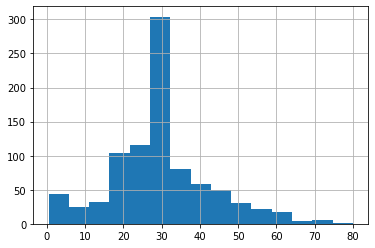

In [93]:
df['Age'].hist(bins=15)

{'whiskers': [<matplotlib.lines.Line2D at 0x192fff056a0>,
 'caps': [<matplotlib.lines.Line2D at 0x192fff05d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x192fff05340>],
 'medians': [<matplotlib.lines.Line2D at 0x192fff12460>],
 'fliers': [<matplotlib.lines.Line2D at 0x192fff127c0>],
 'means': []}

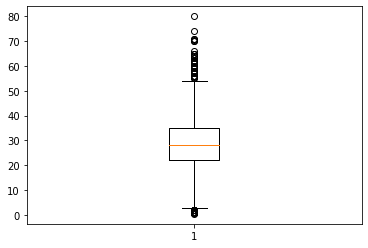

In [94]:
#This seems to be a normal distribution. Let us check if it has any outliers.

plt.boxplot(df['Age'])

There are a lot of outliers in Age, which have to be dealt with.

<AxesSubplot:>

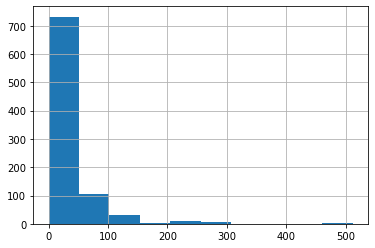

In [95]:
#Fare column

df['Fare'].hist()

Fare - This column is not a normal distribution, as the mean and median are far apart. We have to normalise it.

{'whiskers': [<matplotlib.lines.Line2D at 0x192fffd57c0>,
 'caps': [<matplotlib.lines.Line2D at 0x192fffd5e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x192fffd5460>],
 'medians': [<matplotlib.lines.Line2D at 0x19280002580>],
 'fliers': [<matplotlib.lines.Line2D at 0x192800028e0>],
 'means': []}

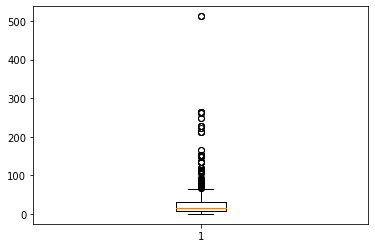

In [96]:
#outliers

plt.boxplot(df['Fare'])

Fare has a huge number of outliers which, again, have to be dealt with before modelling.

3    491
1    216
2    184
Name: Pclass, dtype: int64


<AxesSubplot:>

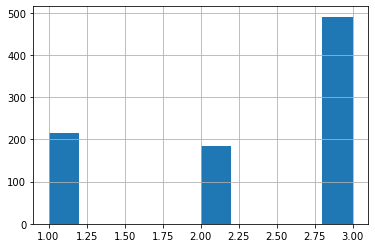

In [97]:
#Pclass

print(df['Pclass'].value_counts())
df['Pclass'].hist()

So, Pclass is a independent variable containing categorical data in the form 1,2,3.

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


<AxesSubplot:>

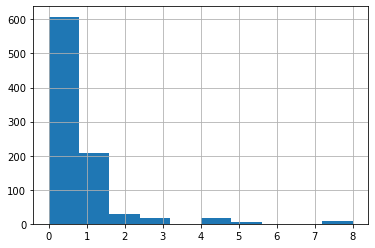

In [98]:
#SibSp variable

print(df['SibSp'].value_counts())
df['SibSp'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x19280149a30>,
 'caps': [<matplotlib.lines.Line2D at 0x19280157130>,
 'boxes': [<matplotlib.lines.Line2D at 0x192801496d0>],
 'medians': [<matplotlib.lines.Line2D at 0x192801577f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19280157b50>],
 'means': []}

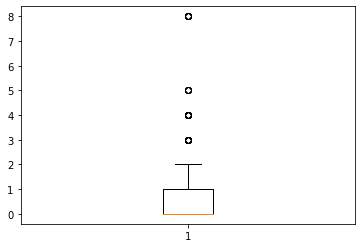

In [99]:
#outliers SibSp

plt.boxplot(df['SibSp'])

SibSp is again a numerical column with a lot of outliers. These outliers have to be dealt with.

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


<AxesSubplot:>

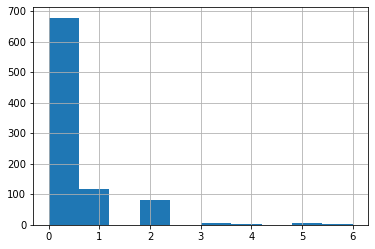

In [100]:
#Parch variable

print(df['Parch'].value_counts())
df['Parch'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x1928022e220>,
 'caps': [<matplotlib.lines.Line2D at 0x1928022e8e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19280220e80>],
 'medians': [<matplotlib.lines.Line2D at 0x1928022efa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1928023a340>],
 'means': []}

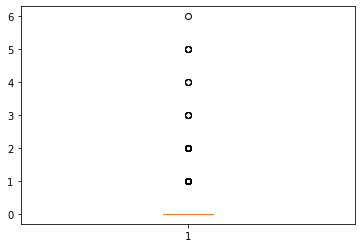

In [101]:
plt.boxplot(df['Parch'])

Parch also seems to have a lot of outliers. We have to deal with them.

# Outliers Removing

In [102]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [103]:
df.shape

(891, 12)

In [104]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S


We will Start with the Age column. We have to find a function which removes the outliers.

In [105]:
df["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x19280281fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x192802906d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19280281c70>],
 'medians': [<matplotlib.lines.Line2D at 0x19280290d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1928029c130>],
 'means': []}

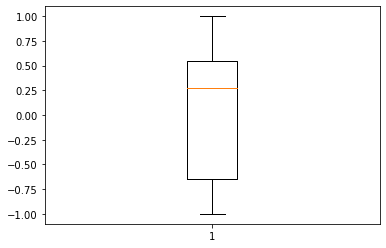

In [106]:
df['NewAge'] = np.sin(df['Age'])
plt.boxplot(df['NewAge'])

In [107]:
df['NewAge'].describe()

count    891.000000
mean       0.043269
std        0.646701
min       -0.999990
25%       -0.643538
50%        0.270906
75%        0.551427
max        0.999912
Name: NewAge, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x192fff3c100>,
 'caps': [<matplotlib.lines.Line2D at 0x192fff3ceb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x192ffebcf10>],
 'medians': [<matplotlib.lines.Line2D at 0x192fff8a520>],
 'fliers': [<matplotlib.lines.Line2D at 0x192fffb06a0>],
 'means': []}

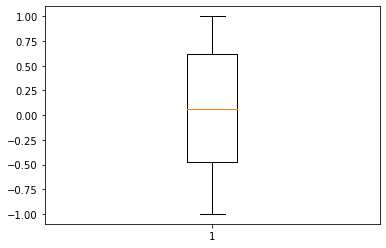

In [108]:
df['NewFare'] = np.cos(df['Fare'])
plt.boxplot(df['NewFare'])

Checking the probability of people surviving on the basis of Pclass

In [109]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


From this data we have found out a very important result -

1. If a person is in Pclass 3, then the person has least chance of surviving.
2. If the person is in Pclass 1, then the person has a very high chance of surviving. So, Pclass and Survived have some correlation.

# Data Featuring

In [110]:
df['Cab'] = df['Cabin'].astype(str).str[0]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewAge,NewFare,Cab
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,-0.008851,0.567924,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.296369,-0.562549,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,0.762558,-0.070959,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,-0.428183,-0.953222,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,-0.428183,-0.194765,U


In [111]:
df['Cab'].value_counts()

U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cab, dtype: int64

In [112]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewAge,NewFare,Cab
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,-0.008851,0.567924,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.296369,-0.562549,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,0.762558,-0.070959,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,-0.428183,-0.953222,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,-0.428183,-0.194765,U


In [113]:
df['fam'] = df['SibSp']+df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewAge,NewFare,Cab,fam
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,-0.008851,0.567924,U,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.296369,-0.562549,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,0.762558,-0.070959,U,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,-0.428183,-0.953222,C,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,-0.428183,-0.194765,U,0


Checking the probability of people surviving on the basis of fam

In [114]:
df[['fam', 'Survived']].groupby(['fam'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,fam,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


In [115]:
df['fam'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: fam, dtype: int64

So, what I did here is create a new feature called fam. 

This fam feature holds the number of people in the family, which by the logic of the problem is the summation of SibSp and Parch. We have found that with 3 family members, almost 72% people are surviving.



In [116]:
#Checking the probability of people surviving on the basis of Sex

df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


This is a very important piece of information. Females have much higher chances of survivng than males. Hence, the Sex column will be one of the most important columns for this data set.

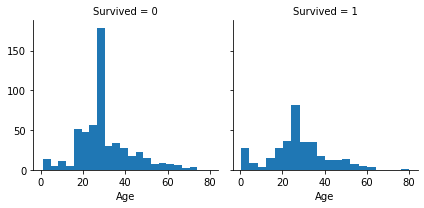

In [117]:
#Plotting Survived vs Age

g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

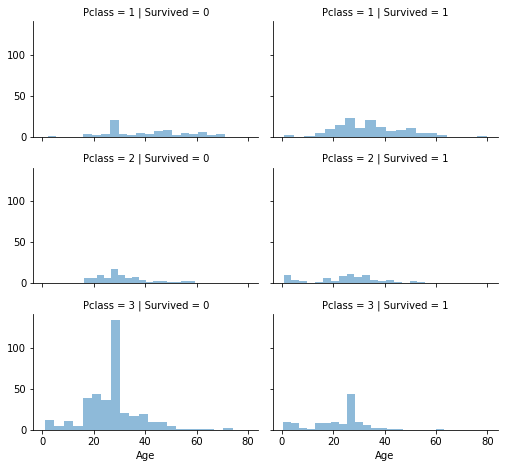

In [118]:
#Plotting Survived based on Pclass and Age

grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

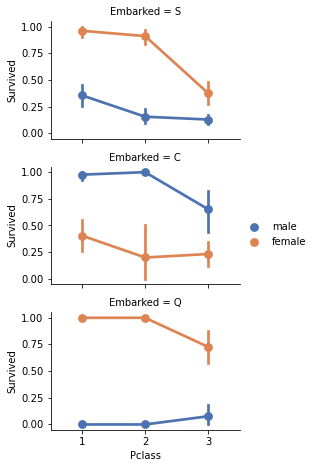

In [119]:
#plotting age and Embark

grid = sns.FacetGrid(df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

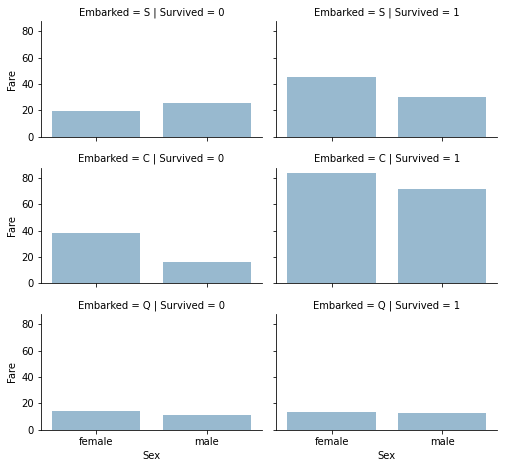

In [120]:
#Plotting Survived on the basis of Embarked Sex and Fare

grid = sns.FacetGrid(df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

1. Extracting the title from name
2. Creating more meaningful features

In [121]:
import re
def findTitle(name):
    match = re.search("(Dr|Mrs?|Ms|Miss|Master|Rev|Capt|Mlle|Col|Major|Sir|Jonkheer|Lady|the Countess|Mme|Don)\\.",name)
    if match:
        title = match.group(0)
        if (title == 'Don.' or title == 'Major.' or title == 'Capt.'):
            title = 'Sir.'
        if (title == 'Mlle.' or title == 'Mme.'):
            title = 'Miss.'
        return title
    else:
        return "Other"
df["Title"] = df["Name"].apply(findTitle)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewAge,NewFare,Cab,fam,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,-0.008851,0.567924,U,1,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.296369,-0.562549,C,1,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,0.762558,-0.070959,U,0,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,-0.428183,-0.953222,C,1,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,-0.428183,-0.194765,U,0,Mr.


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  NewAge       891 non-null    float64
 13  NewFare      891 non-null    float64
 14  Cab          891 non-null    object 
 15  fam          891 non-null    int64  
 16  Title        891 non-null    object 
dtypes: float64(4), int64(6), object(7)
memory usage: 118.5+ KB


In [123]:
pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
Col.,0,2
Dr.,1,6
Jonkheer.,0,1
Lady.,1,0
Master.,0,40
Miss.,185,0
Mr.,0,517
Mrs.,125,0
Ms.,1,0


In [124]:
df["T"] = df["Ticket"].apply(lambda x: str(x)[0])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewAge,NewFare,Cab,fam,Title,T
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,-0.008851,0.567924,U,1,Mr.,A
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.296369,-0.562549,C,1,Mrs.,P
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,0.762558,-0.070959,U,0,Miss.,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,-0.428183,-0.953222,C,1,Mrs.,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,-0.428183,-0.194765,U,0,Mr.,3


In [125]:
df['T'].value_counts()

3    301
2    183
1    146
S     65
P     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
Name: T, dtype: int64

In [126]:
df['T'].replace({'S':10,'P':11,'C':12,'A':13,'W':14,'F':15,'L':16},inplace = True)
df['T'].value_counts()

3     301
2     183
1     146
11     65
10     65
12     47
13     29
14     13
4      10
7       9
15      7
6       6
16      4
5       3
8       2
9       1
Name: T, dtype: int64

In [127]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewAge,NewFare,Cab,fam,Title,T
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,-0.008851,0.567924,U,1,Mr.,13
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.296369,-0.562549,C,1,Mrs.,11
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,0.762558,-0.070959,U,0,Miss.,10
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,-0.428183,-0.953222,C,1,Mrs.,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,-0.428183,-0.194765,U,0,Mr.,3


# Encoding the categories into numeric values

In [128]:
df['Cab'].value_counts()

U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cab, dtype: int64

As we have extracted the title, name isn't of much use now. Even Passenger ID can be dropped.

In [160]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [161]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewAge,NewFare,Cab,fam,Title,T
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,-0.008851,0.567924,U,1,Mr.,13
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.296369,-0.562549,C,1,Mrs.,11
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,0.762558,-0.070959,U,0,Miss.,10
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,-0.428183,-0.953222,C,1,Mrs.,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,-0.428183,-0.194765,U,0,Mr.,3


In [163]:
for i in df.columns:
    if df[i].dtypes=="int":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [164]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewAge,NewFare,Cab,fam,Title,T
0,1,0,3,108.0,1.0,22.0,1,0,523.0,7.2500,147.0,2.0,-0.008851,0.567924,8.0,1,6.0,13
1,2,1,1,190.0,0.0,38.0,1,0,596.0,71.2833,81.0,0.0,0.296369,-0.562549,2.0,1,7.0,11
2,3,1,3,353.0,0.0,26.0,0,0,669.0,7.9250,147.0,2.0,0.762558,-0.070959,8.0,0,5.0,10
3,4,1,1,272.0,0.0,35.0,1,0,49.0,53.1000,55.0,2.0,-0.428183,-0.953222,2.0,1,7.0,1
4,5,0,3,15.0,1.0,35.0,0,0,472.0,8.0500,147.0,2.0,-0.428183,-0.194765,8.0,0,6.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548.0,1.0,27.0,0,0,101.0,13.0000,147.0,2.0,0.956376,0.907447,8.0,0,9.0,2
887,888,1,1,303.0,0.0,19.0,0,0,14.0,30.0000,30.0,2.0,0.149877,0.154251,1.0,0,5.0,1
888,889,0,3,413.0,0.0,28.0,1,2,675.0,23.4500,147.0,2.0,0.270906,-0.111711,8.0,3,5.0,14
889,890,1,1,81.0,1.0,26.0,0,0,8.0,30.0000,60.0,0.0,0.762558,0.154251,2.0,0,6.0,1


In [165]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewAge,NewFare,Cab,fam,Title,T
0,1,0,3,108.0,1.0,22.0,1,0,523.0,7.2500,147.0,2.0,-0.008851,0.567924,8.0,1,6.0,13
1,2,1,1,190.0,0.0,38.0,1,0,596.0,71.2833,81.0,0.0,0.296369,-0.562549,2.0,1,7.0,11
2,3,1,3,353.0,0.0,26.0,0,0,669.0,7.9250,147.0,2.0,0.762558,-0.070959,8.0,0,5.0,10
3,4,1,1,272.0,0.0,35.0,1,0,49.0,53.1000,55.0,2.0,-0.428183,-0.953222,2.0,1,7.0,1
4,5,0,3,15.0,1.0,35.0,0,0,472.0,8.0500,147.0,2.0,-0.428183,-0.194765,8.0,0,6.0,3


In [166]:
df = df.drop(['Name', 'PassengerId'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewAge,NewFare,Cab,fam,Title,T
0,0,3,1.0,22.0,1,0,523.0,7.2500,147.0,2.0,-0.008851,0.567924,8.0,1,6.0,13
1,1,1,0.0,38.0,1,0,596.0,71.2833,81.0,0.0,0.296369,-0.562549,2.0,1,7.0,11
2,1,3,0.0,26.0,0,0,669.0,7.9250,147.0,2.0,0.762558,-0.070959,8.0,0,5.0,10
3,1,1,0.0,35.0,1,0,49.0,53.1000,55.0,2.0,-0.428183,-0.953222,2.0,1,7.0,1
4,0,3,1.0,35.0,0,0,472.0,8.0500,147.0,2.0,-0.428183,-0.194765,8.0,0,6.0,3


In [167]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewAge,NewFare,Cab,fam,Title
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,-0.164549,0.257307,-0.254888,-0.167675,-0.061049,0.031444,-0.301116,0.016639,-0.066895
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,0.319869,-0.549500,0.684121,0.162098,0.099745,-0.054984,0.746616,0.065997,-0.051372
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,0.059372,-0.182333,0.096681,0.108262,0.055454,0.047605,0.123076,-0.200988,0.020070
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,-0.070382,0.096688,-0.240839,-0.018754,-0.028529,0.008114,-0.255783,-0.245619,0.307698
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.079461,0.159651,0.043593,0.068230,0.030785,-0.005564,0.041540,0.890712,-0.165040
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.020003,0.216225,-0.028324,0.039798,0.014784,-0.043604,-0.032548,0.783111,-0.059074
Ticket,-0.164549,0.319869,0.059372,-0.070382,0.079461,0.020003,1.000000,-0.013885,0.243696,-0.001729,-0.020716,-0.186367,0.256307,0.064302,0.003397
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,-0.013885,1.000000,-0.503355,-0.224719,-0.073470,-0.097692,-0.523013,0.217138,-0.024281
Cabin,-0.254888,0.684121,0.096681,-0.240839,0.043593,-0.028324,0.243696,-0.503355,1.000000,0.202520,0.092921,0.024397,0.947729,0.015644,-0.036544
Embarked,-0.167675,0.162098,0.108262,-0.018754,0.068230,0.039798,-0.001729,-0.224719,0.202520,1.000000,-0.005311,0.032264,0.194255,0.066516,0.047016


<AxesSubplot:>

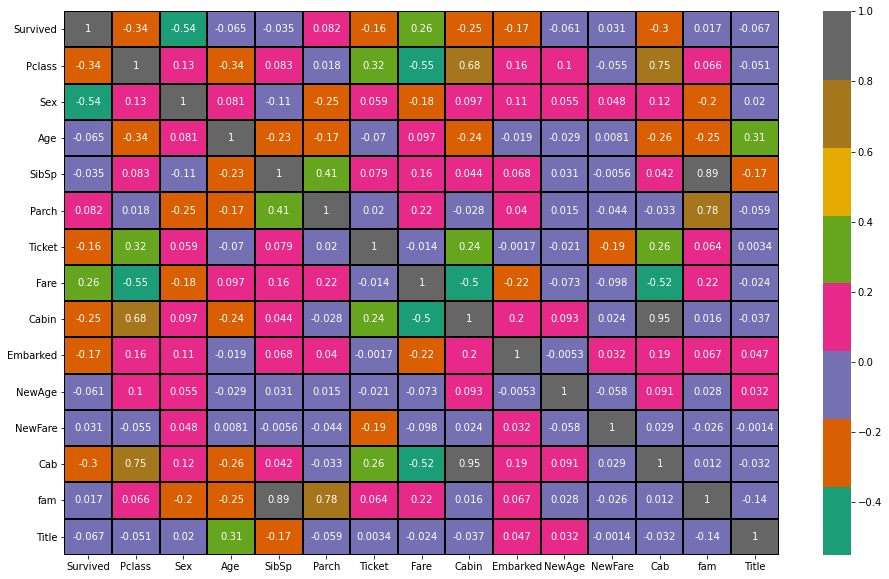

In [168]:
plt.figure(figsize= (16,10))
sns.heatmap(df.corr(),cmap = 'Dark2',annot = True,linewidths=1.0,linecolor='black')

<AxesSubplot:>

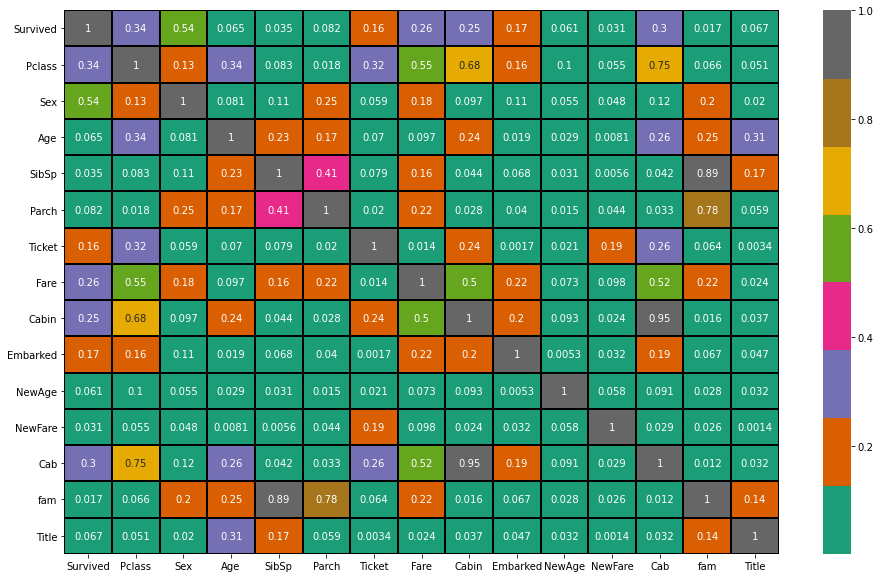

In [169]:
plt.figure(figsize= (16,10))
sns.heatmap(np.abs(df.corr()),cmap = 'Dark2',annot = True,linewidths=1.0,linecolor='black')

From the above heatmap, we can conclude that the Survived column is correlated to(high ones)-

Title
Sex
PClass
Fare
Embarked
Cab

In [170]:
df.shape

(891, 16)

In [171]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.510245
SibSp       3.695352
Parch       2.749117
Ticket      0.000246
Fare        4.787317
Cabin      -2.167313
Embarked   -1.264823
NewAge     -0.223058
NewFare    -0.090272
Cab        -1.546140
fam         2.727441
Title      -0.821471
T           1.062372
dtype: float64

In [172]:
df.dtypes

Survived      int64
Pclass        int64
Sex         float64
Age         float64
SibSp         int64
Parch         int64
Ticket      float64
Fare        float64
Cabin       float64
Embarked    float64
NewAge      float64
NewFare     float64
Cab         float64
fam           int64
Title       float64
T            object
dtype: object

In [173]:
x=df.iloc[:,:-1]

In [174]:
y=df.iloc[:,-1]

In [175]:
x.shape

(891, 15)

In [176]:
y.shape

(891,)

In [177]:
from sklearn.model_selection import train_test_split

In [178]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20,random_state=42)

In [179]:
xtrain.shape

(712, 15)

In [180]:
xtest.shape

(179, 15)

In [181]:
ytrain.shape

(712,)

In [182]:
ytest.shape

(179,)

# Data Transformation and Scaling

In [183]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-0.78927234,  0.86397329,  0.73769513, ...,  0.5416657 ,
         0.89382792,  0.12917691],
       [ 1.2669898 , -1.45912855, -1.35557354, ..., -1.92906679,
         0.89382792,  1.23376376],
       [ 1.2669898 ,  0.86397329, -1.35557354, ...,  0.5416657 ,
        -0.79616885, -0.88435596],
       ...,
       [-0.78927234,  0.86397329, -1.35557354, ...,  0.5416657 ,
         1.51219081, -0.88435596],
       [ 1.2669898 , -1.45912855,  0.73769513, ..., -1.92906679,
        -0.79616885,  0.12917691],
       [-0.78927234,  0.86397329,  0.73769513, ...,  0.5416657 ,
        -0.79616885,  0.12917691]])

In [184]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.78927234,  0.86397329,  0.73769513, ...,  0.5416657 ,
         0.89382792,  0.12917691],
       [ 1.2669898 , -1.45912855, -1.35557354, ..., -1.92906679,
         0.89382792,  1.23376376],
       [ 1.2669898 ,  0.86397329, -1.35557354, ...,  0.5416657 ,
        -0.79616885, -0.88435596],
       ...,
       [-0.78927234,  0.86397329, -1.35557354, ...,  0.5416657 ,
         1.51219081, -0.88435596],
       [ 1.2669898 , -1.45912855,  0.73769513, ..., -1.92906679,
        -0.79616885,  0.12917691],
       [-0.78927234,  0.86397329,  0.73769513, ...,  0.5416657 ,
        -0.79616885,  0.12917691]])

In [185]:
from sklearn.linear_model import LogisticRegression   
from sklearn.model_selection import KFold 
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics

In [186]:
def classification_model(model, data, predictors, outcome):  
    #Fit the model:  
    model.fit(data[predictors],data[outcome])    
    #Make predictions on training set:  
    predictions = model.predict(data[predictors])    
    #Print accuracy  
    accuracy = metrics.accuracy_score(predictions,data[outcome])  
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    #Perform k-fold cross-validation with 5 folds  
    kf = KFold(5,shuffle=True) 
    error = []  
    for train, test in kf.split(data):
        # Filter training data    
        train_predictors = (data[predictors].iloc[train,:])        
        # The target we're using to train the algorithm.    
        train_target = data[outcome].iloc[train]        
        # Training the algorithm using the predictors and target.    
        model.fit(train_predictors, train_target)
        #Record error from each cross-validation run    
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
        
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error))) 
    # %s is placeholder for data from format, next % is used to conert it into percentage
    #.3% is no. of decimals
    return model

In [187]:
output = 'Survived'
model = RandomForestClassifier()
predict = ['Age','Title','Pclass','Sex']
classification_model(model,df,predict,output)
m = classification_model(model,df,predict,output)
a = m.predict(xtest[predict])
a

Accuracy : 88.777%
Cross-Validation Score : 80.023%
Accuracy : 88.777%
Cross-Validation Score : 79.913%


array([1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1], dtype=int64)

In [188]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewAge,NewFare,Cab,fam,Title,T
0,0,3,1.0,22.0,1,0,523.0,7.2500,147.0,2.0,-0.008851,0.567924,8.0,1,6.0,13
1,1,1,0.0,38.0,1,0,596.0,71.2833,81.0,0.0,0.296369,-0.562549,2.0,1,7.0,11
2,1,3,0.0,26.0,0,0,669.0,7.9250,147.0,2.0,0.762558,-0.070959,8.0,0,5.0,10
3,1,1,0.0,35.0,1,0,49.0,53.1000,55.0,2.0,-0.428183,-0.953222,2.0,1,7.0,1
4,0,3,1.0,35.0,0,0,472.0,8.0500,147.0,2.0,-0.428183,-0.194765,8.0,0,6.0,3


In [189]:
df.shape

(891, 16)

In [190]:
from sklearn import svm

In [191]:
output = 'Survived'
model = svm.SVC()
predict = ['Sex','Title','Pclass','Cab','Embarked']
classification_model(model,df,predict,output)
m = classification_model(model,df,predict,output)
a = m.predict(xtest[predict])
a

Accuracy : 78.788%
Cross-Validation Score : 78.115%
Accuracy : 78.788%
Cross-Validation Score : 78.111%


array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1], dtype=int64)

In [192]:
from sklearn.neighbors import KNeighborsClassifier

output = 'Survived'
model = KNeighborsClassifier(n_neighbors = 3)
predict = ['Sex','Title','Pclass']
classification_model(model,df,predict,output)
m = classification_model(model,df,predict,output)
a = m.predict(df[predict])
a

Accuracy : 79.910%
Cross-Validation Score : 77.327%
Accuracy : 79.910%
Cross-Validation Score : 76.322%


array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [193]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [194]:
parameters = {'criterion':['mse', 'mae'],'max_features':["auto", "sqrt", "log2"]}
rf =RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [195]:
rf= RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(xtrain, ytrain)
rf.score(xtrain, ytrain)
pred_decision = rf.predict(xtest)

rfs = r2_score(ytest,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 99.7438997388227
Cross Val Score: 99.7691359807806


We are getting model accuracy and cross validation both as 99.8% which shows our model is performing extremely well

In [196]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Saving The Model

In [197]:
import pickle
filename = 'Titanic.pkl'
pickle.dump(rf, open(filename, 'wb'))

# Conclusion:

In [198]:
loaded_model = pickle.load(open('Titanic.pkl', 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

0.997438997388227


In [199]:
conclusion=pd.DataFrame([loaded_model.predict(xtest)[:],pred_decision[:]],index=["Predicted","Orginal"])

In [200]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,169,170,171,172,173,174,175,176,177,178
Predicted,2.0,12.0,10.0,2.0,2.0,1.0,11.19,3.0,3.0,1.0,...,10.0,11.0,2.0,11.0,2.0,10.0,2.0,3.0,10.0,10.92
Orginal,2.0,12.0,10.0,2.0,2.0,1.0,11.19,3.0,3.0,1.0,...,10.0,11.0,2.0,11.0,2.0,10.0,2.0,3.0,10.0,10.92
